# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [18]:
#let's give this a go

In [19]:
from citipy import citipy
import pandas as pd
import numpy as np
import json 
import requests
from pprint import pprint
import matplotlib.pyplot as plt
from scipy import stats
from api_keys import weather_api_key

In [20]:
weather_api_key

'a18023732a8ff6de5a1f2bad3b1e3ce5'

## Generate Cities List

In [21]:
### I found some examples of code to creates the cities list, and with the looping (directly from class 'nearest resturant' example)
#### Listing the reference:  https://ronamadthis.github.io/citipyweather.html
#### Also explaning each step so that it's known that I understand! 

# Generate latitudes(-90 to 90) and longitudes(-180 to 180) using random number generator
random_city_df = pd.DataFrame({'long':(np.random.uniform(-180,180,1300)), 'lat':(np.random.uniform(-90,90,1300))})
random_city_df.head()

,long,lat
0,10.781778,73.720745
1,58.102896,-87.219568
2,-99.318010,-80.038423
3,176.342260,-10.508928
4,66.378518,42.581710


In [22]:
## Here I'm making two lists to that the following loop will fill to create a dataframe of cities, that will intern be used in the OpenWeather API
cities_name = []
countrycode = []

## this for loop states that from the begining of the above data frame to the last row...
for i in range(0,len(random_city_df['lat'])):
   
    #... I will pull the lat and long from each line, matching them together.
    # I originally thought I could for row in rows, but the lat and long need to be matched together to create the location
    # therein, they need to be looked at as a pair:
    lat = random_city_df.iloc[i]['lat']
    long = random_city_df.iloc[i]["long"]
    
    # Here we create a variable and assign with the pandas function nearest_city - using the lat and long pulled from each line
    city = citipy.nearest_city(lat,long) 
    
    # In these 4 lines of code, I'm assigning the city and country, and appending those to the open lists created above
    name = city.city_name
    cities_name.append(name)
    country = city.country_code
    countrycode.append(country)

### Finally, outside of the loop, columns are generated with the lists that have been created for City and Country
random_city_df['City']=cities_name
random_city_df['Country']=countrycode
random_city_df.head(10)

,long,lat,City,Country
0,10.781778,73.720745,barentsburg,sj
1,58.102896,-87.219568,east london,za
2,-99.318010,-80.038423,punta arenas,cl
3,176.342260,-10.508928,asau,tv
4,66.378518,42.581710,zhanakorgan,kz
5,25.571831,-89.773918,bredasdorp,za
6,12.734747,-6.516690,soyo,ao
7,111.429322,-89.359521,albany,au
8,148.776172,64.514670,shirokiy,ru
9,-118.257668,53.016707,jasper,ca


In [23]:
len(random_city_df)

1300

In [24]:
# Drop duplicate cities in 'City' --- as to not repeat the data:: since it's grabbing 'closest city' -- I'm there may be some that it double pulls
# From multiple trial and error of running the code --- it took 1300 cities in the orig random data pull to maintain 500+ non-repeat cities
cities = random_city_df.drop_duplicates("City", keep='first')
len(cities)

568

In [46]:
cities.head()

,long,lat,City,Country
0,10.781778,73.720745,barentsburg,sj
1,58.102896,-87.219568,east london,za
2,-99.318010,-80.038423,punta arenas,cl
3,176.342260,-10.508928,asau,tv
4,66.378518,42.581710,zhanakorgan,kz


In [ ]:
## I needed the longitude call for the city locations, but the hw is asking specifically about temps closer to the equator. 
## But only need the lat for the plots.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
## We had several examples of pulling from OpenWeather API in class. 
## Pulling in my API key here, as well as Google API keys, as the python file calls for:


######## building this from OpenWeather API, howver -- but we only pulled data for one city, so I will need to loop for each city:

# url = "http://api.openweathermap.org/data/2.5/weather?"
# city = "Houston"
# units = "imperial"

# # Build query URL
# # query_url = url + "appid=" + api_key + "&q=" + city +"&units=" + units
# query_url = url + "q=" + city + "&units=" + units + "&appid=" + weather_api_key
# query_url


#OpenWeather reference URL's
#api.openweathermap.org/data/2.5/weather?q={city name},{state code},{country code}&appid={your api key}

#...I'm wondering if I can just use Lat and Long:
#api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={your api key}

In [ ]:
### this is the data I want:
# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude

In [15]:
## Creating cities df for data loop
cities["Temperature"]= ""
cities["Humidity"]= ""
cities["Cloudiness"] = ""
cities["Wind Speed"] = ""
cities["Date"]= ""
cities.head()

/Users/robpascarella/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/robpascarella/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/robpascarella/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,long,lat,City,Country,Temperature,Humidity,Cloudiness,Wind Speed,Date
0,-37.416897,80.665747,tasiilaq,gl,,,,,
1,-143.904685,27.742013,hilo,us,,,,,
2,32.221926,16.188584,umm durman,sd,,,,,
3,-117.800827,-45.744561,rikitea,pf,,,,,
4,119.788039,81.414945,saskylakh,ru,,,,,


In [61]:
# A separate URL attempt from example ::: Saving this as a reference, as I'm sure the structure will be useful in the future. 
    
# query_url="http://api.openweathermap.org/data/2.5/weather?q=%s&units=IMPERIAL&mode=json&APPID=%s" % (row["City"].replace(" ","+"), weather_api_key)
# weather = requests.get(query_url).json()
# pprint(weather)

## from json printout I can see the dictionary in which the key:value pairs for the data I want to grab are avail

#  "Temperature" -> ["main"]["temp_max"]
#  "Humidity" -> ["main"]["humidity"]
#  "Cloudiness" -> ["clouds"]["all"]
#  "Wind Speed" -> ["wind"]["speed"]
#  "Date" -> ["dt"]

In [62]:
# Printing the json return structure:

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'
query = f"{base_url}appid={weather_api_key}&units={units}&q="

city = row['City']
response = requests.get(query + city).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 54.76, 'lon': 83.1},
 'dt': 1600099340,
 'id': 1510350,
 'main': {'feels_like': 50.2,
          'humidity': 76,
          'pressure': 1017,
          'temp': 53.6,
          'temp_max': 53.6,
          'temp_min': 53.6},
 'name': 'Berdsk',
 'sys': {'country': 'RU',
         'id': 8958,
         'sunrise': 1600041516,
         'sunset': 1600087676,
         'type': 1},
 'timezone': 25200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 70, 'speed': 4.47}}


In [60]:
# Now, Loop through the cities to pull the weather search; this structure is example from class
   
      
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'
query = f"{base_url}appid={weather_api_key}&units={units}&q="


for index, row in cities.iterrows():
    
    city = row['City']
    response = requests.get(query + city).json()
    
    
    try:
        cities.loc[index,"Temperature"] = response["main"]["temp_max"]
        cities.loc[index,"Humidity"] = response["main"]["humidity"]
        cities.loc[index,"Cloudiness"] = response["clouds"]["all"]
        cities.loc[index,"Wind Speed"] = response["wind"]["speed"]
        cities.loc[index,"Date"] = response["dt"]
        #print("Success, next data...")
    except:
        print("No data, skipping...")  
 

cities.head()



No data, skipping...


/Users/robpascarella/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...
No data, skipping...


,long,lat,City,Country,Temperature,Humidity,Cloudiness,Wind Speed,Date
0,10.781778,73.720745,barentsburg,sj,51.80,76.0,87.0,4.47,1.600052e+09
1,58.102896,-87.219568,east london,za,59.00,67.0,3.0,19.46,1.600099e+09
2,-99.318010,-80.038423,punta arenas,cl,46.40,61.0,20.0,40.26,1.600099e+09
3,176.342260,-10.508928,asau,tv,70.00,71.0,2.0,4.16,1.600100e+09
4,66.378518,42.581710,zhanakorgan,kz,72.48,23.0,0.0,10.98,1.600100e+09


In [ ]:
# Saving this data to csv, as requested in hw. 

cities.to_csv("City_Weather_Output.csv")

In [77]:
# Inspecting the dataset per given notebook:

cities.describe()

,long,lat,Temperature,Humidity,Cloudiness,Wind Speed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,25.890247,18.781696,67.259560,67.876761,50.473592,8.042201,1.600096e+09
std,93.152668,37.640439,16.907935,22.409582,37.709312,5.616310,1.238352e+04
min,-178.198412,-89.773918,28.400000,3.000000,0.000000,0.090000,1.600052e+09
25%,-52.862478,-9.376134,51.800000,56.000000,9.750000,4.470000,1.600099e+09
50%,34.006218,22.843387,69.010000,76.000000,51.000000,6.900000,1.600099e+09
75%,109.018119,49.116554,80.040000,85.000000,87.000000,10.290000,1.600099e+09
max,177.727830,88.087086,114.170000,100.000000,100.000000,40.260000,1.600100e+09


In [86]:
# it doesn't look like there are cities with > 100% humidity (raining), which is what the instruction says, but I would imagine you'd want to filter out all raining places = 100%??
# to remove them:

no_rain = cities.loc[cities['Humidity'] < 100]
no_rain

### Already had the other plots made up -- just showing that I have this df it it's desired to plot the data, just as I have below. 

,long,lat,City,Country,Temperature,Humidity,Cloudiness,Wind Speed,Date
0,10.781778,73.720745,barentsburg,sj,51.80,76.0,87.0,4.47,1.600052e+09
1,58.102896,-87.219568,east london,za,59.00,67.0,3.0,19.46,1.600099e+09
2,-99.318010,-80.038423,punta arenas,cl,46.40,61.0,20.0,40.26,1.600099e+09
3,176.342260,-10.508928,asau,tv,70.00,71.0,2.0,4.16,1.600100e+09
4,66.378518,42.581710,zhanakorgan,kz,72.48,23.0,0.0,10.98,1.600100e+09
...,...,...,...,...,...,...,...,...,...
1281,-53.401941,4.810495,iracoubo,gf,86.36,62.0,1.0,9.17,1.600099e+09
1288,-91.956754,-17.441980,huarmey,pe,66.51,68.0,66.0,9.13,1.600099e+09
1293,140.914983,29.718047,shimoda,jp,68.00,95.0,34.0,1.01,1.600099e+09
1294,-81.519211,-49.769924,coihaique,cl,50.00,57.0,90.0,12.75,1.600099e+09


In [64]:
# Now onto creating the plots; revisiting the need from above:

### this is the data I want:
#1 Temperature (F) vs. Latitude
#2 Humidity (%) vs. Latitude
#3 Cloudiness (%) vs. Latitude
#4 Wind Speed (mph) vs. Latitude



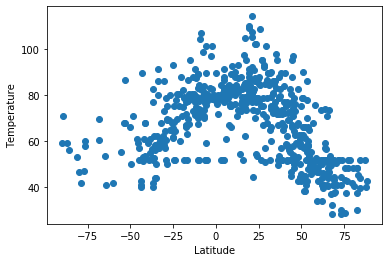

In [70]:
lat = cities['lat']
temp = cities['Temperature']

#plt.figure(figsize=(7,5))
plt.scatter(lat,temp)
plt.xlabel('Latitude')
plt.ylabel('Temperature (Deg F)')
plt.show()


In [ ]:
# Looks like temps are higher towards the 0 thru +25 latitude area, and lower in the extremes of the latitude areas +/-75 

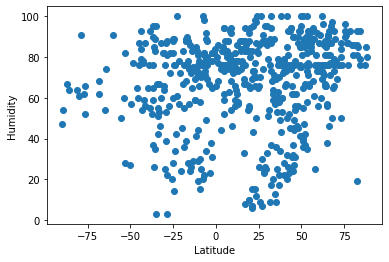

In [71]:
lat = cities['lat']
humidity = cities['Humidity']

#plt.figure(figsize=(7,5))
plt.scatter(lat,humidity)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()


In [ ]:
# Looks like a large grouping of humidity is in the higher temps and a bit shifted towards the northern 

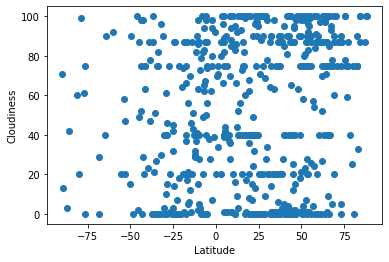

In [72]:
lat = cities['lat']
cloudiness = cities['Cloudiness']

#plt.figure(figsize=(7,5))
plt.scatter(lat,cloudiness)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

In [ ]:
# No real obvious correlations here - there seems to be some straight-line data in the round numbers: 20-40-80-100.
# I would assume that these are locations in which they are generalizing the data (guessing/estimating) rather than measuring. 

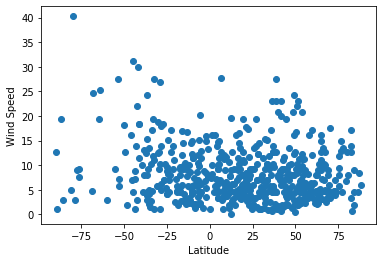

In [73]:
lat = cities['lat']
wind = cities['Wind Speed']

#plt.figure(figsize=(7,5))
plt.scatter(lat,wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed MPH')
plt.show()

In [91]:
# I don't really see a strong correlation or grouping here
# Other observations can be noted:  the concentration of data points is low wind speeds in the -30 to +60 latitude area in which most of cities lie in the world. 

In [131]:
# The next section asks to split the data into Northern / Southern Hemisphere and plot the following, with linear regression:

# Northern Hemisphere - Temperature (F) vs. Latitude
# Southern Hemisphere - Temperature (F) vs. Latitude
# Northern Hemisphere - Humidity (%) vs. Latitude
# Southern Hemisphere - Humidity (%) vs. Latitude
# Northern Hemisphere - Cloudiness (%) vs. Latitude
# Southern Hemisphere - Cloudiness (%) vs. Latitude
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
# Southern Hemisphere - Wind Speed (mph) vs. Latitude





# # from class examples -- these are the linear regression equations:
# vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, violent_crime_rate)
# vc_fit = vc_slope * year + vc_int

# plt.figure(figsize=(10,8))
# plt.scatter(year, violent_crime_rate)
# plt.plot(year, vc_fit, linestyle="--", color='red')

# plt.xticks(year, rotation=90)
# plt.title("Crime Rate Regression (1994-2013)")
# plt.xlabel('Year')
# plt.ylabel('Violent Crime Rate')
# plt.show()

In [132]:
northern_cities = cities.loc[cities['lat'] >= 0]
northern_cities
     

,long,lat,City,Country,Temperature,Humidity,Cloudiness,Wind Speed,Date
0,10.781778,73.720745,barentsburg,sj,51.80,76.0,87.0,4.47,1.600052e+09
4,66.378518,42.581710,zhanakorgan,kz,72.48,23.0,0.0,10.98,1.600100e+09
8,148.776172,64.514670,shirokiy,ru,56.64,86.0,100.0,5.21,1.600100e+09
9,-118.257668,53.016707,jasper,ca,70.00,82.0,20.0,5.82,1.600100e+09
10,-42.292184,35.798308,ribeira grande,pt,71.60,53.0,20.0,17.22,1.600100e+09
...,...,...,...,...,...,...,...,...,...
1281,-53.401941,4.810495,iracoubo,gf,86.36,62.0,1.0,9.17,1.600099e+09
1282,-54.166062,49.728862,gander,ca,62.60,100.0,90.0,12.75,1.600099e+09
1289,-120.215839,32.306494,port hueneme,us,66.00,100.0,90.0,3.36,1.600099e+09
1293,140.914983,29.718047,shimoda,jp,68.00,95.0,34.0,1.01,1.600099e+09


In [133]:
southern_cities = cities.loc[cities['lat'] < 0]
southern_cities

,long,lat,City,Country,Temperature,Humidity,Cloudiness,Wind Speed,Date
1,58.102896,-87.219568,east london,za,59.00,67.0,3.0,19.46,1.600099e+09
2,-99.318010,-80.038423,punta arenas,cl,46.40,61.0,20.0,40.26,1.600099e+09
3,176.342260,-10.508928,asau,tv,70.00,71.0,2.0,4.16,1.600100e+09
5,25.571831,-89.773918,bredasdorp,za,59.00,47.0,71.0,12.75,1.600100e+09
6,12.734747,-6.516690,soyo,ao,76.42,71.0,67.0,9.82,1.600100e+09
...,...,...,...,...,...,...,...,...,...
1265,87.499519,-7.993369,padang,id,78.93,76.0,100.0,1.88,1.600099e+09
1273,-5.826060,-0.786483,tabou,ci,77.67,84.0,92.0,13.35,1.600099e+09
1277,137.504972,-35.766357,victor harbor,au,44.01,89.0,0.0,2.19,1.600099e+09
1288,-91.956754,-17.441980,huarmey,pe,66.51,68.0,66.0,9.13,1.600099e+09


In [134]:
from scipy import stats

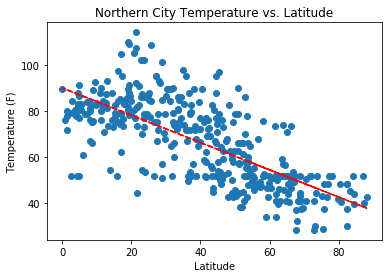

<Figure size 432x288 with 0 Axes>

In [135]:
# Northern Cities Temp Vs. Lat ....... with regress.

nlat = northern_cities['lat']
ntemp = northern_cities['Temperature']

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(nlat, ntemp)
vc_fit = vc_slope * nlat + vc_int

# plt.figure(figsize=(10,8))
plt.scatter(nlat, ntemp)
plt.plot(nlat, vc_fit, linestyle="--", color='red')

plt.title("Northern City Temperature vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()
plt.savefig("northern_cities_temps.png")

In [136]:
# This linear regression definitively shows an increasing trend of temps as the city location moves towards the equator.

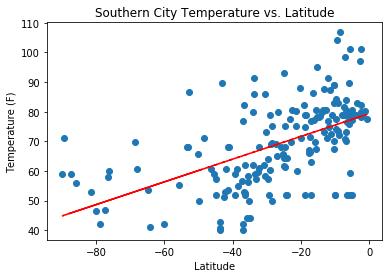

<Figure size 432x288 with 0 Axes>

In [137]:
# Southern Cities Temp Vs. Lat ....... with regress.

slat = southern_cities['lat']
stemp = southern_cities['Temperature']

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(slat, stemp)
vc_fit = vc_slope * slat + vc_int

# plt.figure(figsize=(10,8))
plt.scatter(slat, stemp)
plt.plot(slat, vc_fit, linestyle="--", color='red')

plt.title("Southern City Temperature vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()
plt.savefig("southern_cities_temps.png")

In [138]:
# Again, thislinear regression definitively shows an increasing trend of temps as the city location moves towards the equator.

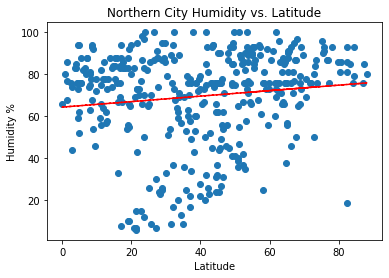

<Figure size 432x288 with 0 Axes>

In [139]:
# Northern Cities Humidity Vs. Lat ....... with regress.

nlat = northern_cities['lat']
nhum = northern_cities['Humidity']

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(nlat, nhum)
vc_fit = vc_slope * nlat + vc_int

# plt.figure(figsize=(10,8))
plt.scatter(nlat, nhum)
plt.plot(nlat, vc_fit, linestyle="--", color='red')

plt.title("Northern City Humidity vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()
plt.savefig("northern_cities_humidity.png")

In [140]:
# I don't particularly think this shows much of a correlation - but the trend line does slightly increase away from the equator 

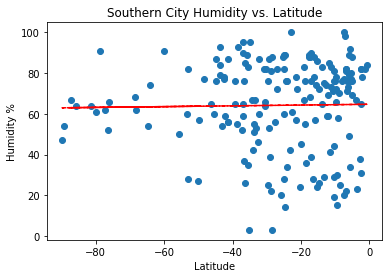

<Figure size 432x288 with 0 Axes>

In [141]:
# Southern Cities Humidity Vs. Lat ....... with regress.

slat = southern_cities['lat']
shum = southern_cities['Humidity']

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(slat, shum)
vc_fit = vc_slope * slat + vc_int

# plt.figure(figsize=(10,8))
plt.scatter(slat, shum)
plt.plot(slat, vc_fit, linestyle="--", color='red')

plt.title("Southern City Humidity vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()
plt.savefig("southern_cities_humidity.png")

In [142]:
# This regression line is almost totally flat, so as noted in the northern hemishphere as well, latitude does not particularly play a role in regard to humidity. 

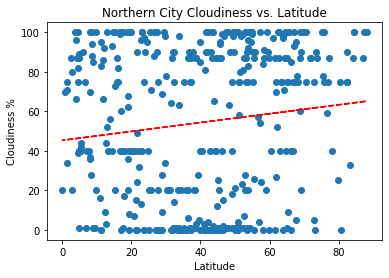

<Figure size 432x288 with 0 Axes>

In [145]:
# Northern Cities Cloudiness Vs. Lat ....... with regress.

nlat = northern_cities['lat']
ncloud = northern_cities['Cloudiness']

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(nlat, ncloud)
vc_fit = vc_slope * nlat + vc_int

# plt.figure(figsize=(10,8))
plt.scatter(nlat, ncloud)
plt.plot(nlat, vc_fit, linestyle="--", color='red')

plt.title("Northern City Cloudiness vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()
plt.savefig("northern_cities_cloudiness.png")

In [146]:
# visually, although the trend line trends negatively towards the equator, cloudiness does correlate to latitude.


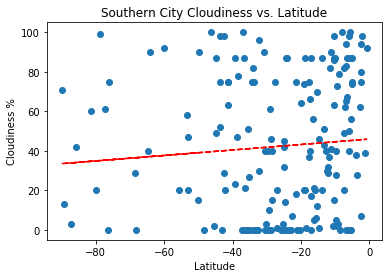

<Figure size 432x288 with 0 Axes>

In [147]:
# Southern Cities Cloudiness Vs. Lat ....... with regress.

slat = southern_cities['lat']
scloud = southern_cities['Cloudiness']

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(slat, scloud)
vc_fit = vc_slope * slat + vc_int

# plt.figure(figsize=(10,8))
plt.scatter(slat, scloud)
plt.plot(slat, vc_fit, linestyle="--", color='red')

plt.title("Southern City Cloudiness vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()
plt.savefig("southern_cities_cloudiness.png")

In [148]:
# visually, although the trend line trends positively towards the equator, cloudiness does correlate to latitude.


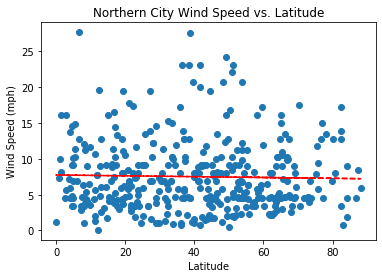

<Figure size 432x288 with 0 Axes>

In [149]:
# Northern Cities Wind Speed Vs. Lat ....... with regress.

nlat = northern_cities['lat']
nwind = northern_cities['Wind Speed']

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(nlat, nwind)
vc_fit = vc_slope * nlat + vc_int

# plt.figure(figsize=(10,8))
plt.scatter(nlat, nwind)
plt.plot(nlat, vc_fit, linestyle="--", color='red')

plt.title("Northern City Wind Speed vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()
plt.savefig("northern_cities_windspeed.png")

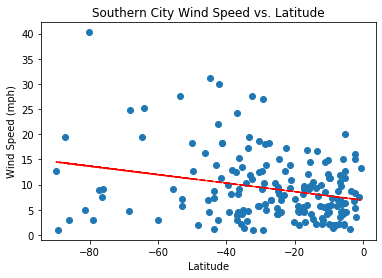

<Figure size 432x288 with 0 Axes>

In [144]:
# Southern Cities Wind Speed Vs. Lat ....... with regress.

slat = southern_cities['lat']
swind = southern_cities['Wind Speed']

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(slat, swind)
vc_fit = vc_slope * slat + vc_int

# plt.figure(figsize=(10,8))
plt.scatter(slat, swind)
plt.plot(slat, vc_fit, linestyle="--", color='red')

plt.title("Southern City Wind Speed vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()
plt.savefig("southern_cities_windspeed.png")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

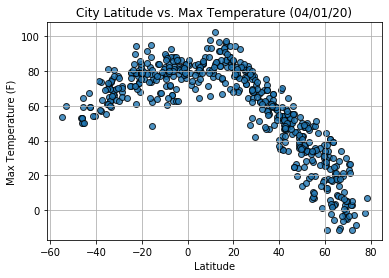

## Latitude vs. Humidity Plot

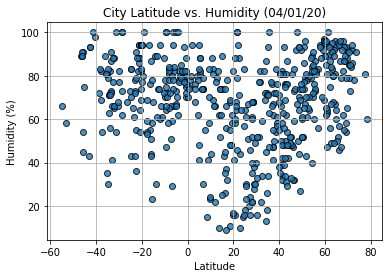

## Latitude vs. Cloudiness Plot

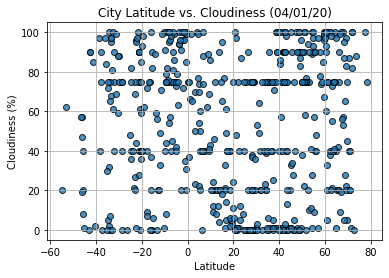

## Latitude vs. Wind Speed Plot

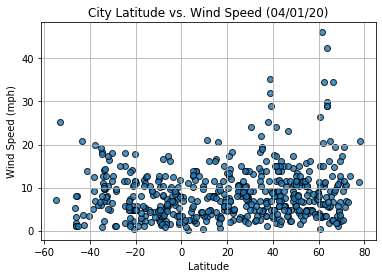

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


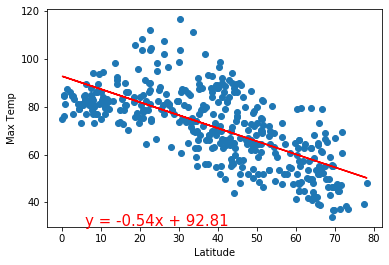

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


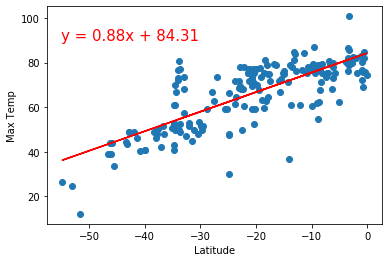

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


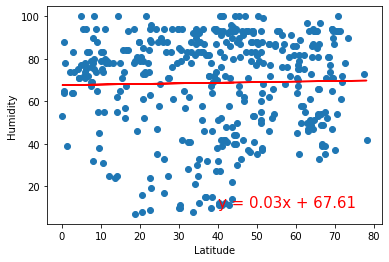

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


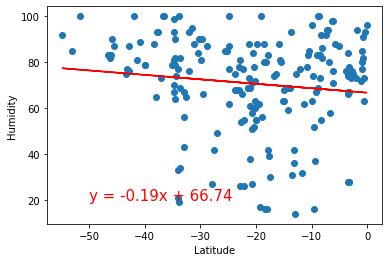

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


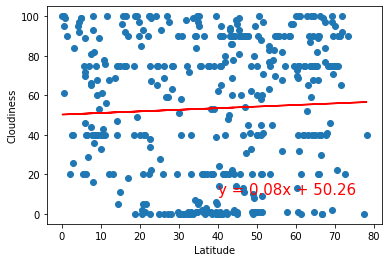

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


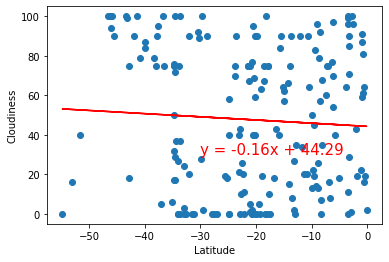

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


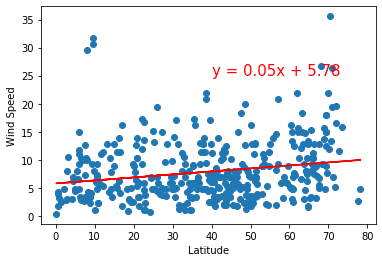

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


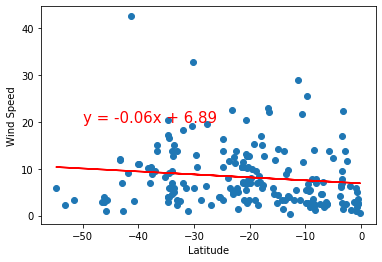